# Machine Learning: Women Diabetes Prediction

## Problem Statement:

Early detection and prediction of diabetes can help mitigate its progression and reduce associated

health risks, By using this real records, we will try to build a machine learning model to predict

whether or not the WOMEN patient is in the dataset have diabetes or not


### Columns:

    Pregnancies : Number of times pregnant 
    
    Glucose : Plasma glucose concentration a 2 hours in an oral glucose tole
    
    BloodPressure : Diastolic blood pressure (mm Hg)
    
    SkinThikness : the measurement of how thick or thin the skin is
    
    Insulin : 2-Hour serum insulin ( mu U/ml)
    
    BMI : Body mass index ( weight in kg / pow(height in m, 2)
    
    DiabetesPedigreeFunction : Diabetes Pedigree Function
    
    Age : in (years)
    
    Outcome : (0 : True : she is   OR 1 : False : she is not)   
    
    
    

##  Overview of each of the imports :

Pandas: for Loading, cleaning, transforming, and analyzing structured data (e.g., CSV files).

Numpy: Working with multi-dimensional arrays and performing mathematical operations.Pyplot is the most used module.

Matplotlib: Plotting graphs such as line charts, bar charts, scatter plots, and histograms.

Seaborn:  Visualizing data distributions, correlations, and relationships through heatmaps, pair plots, etc.

from mlxtend.plotting import plot_decision_regions: Visualizing how a classification algorithm has separated different classes in the data.

from pandas.plotting import scatter_matrix:Understanding correlations and patterns between features in the dataset.

missingno: Checking for and visualizing the extent and patterns of missing data in a dataset.

from sklearn.preprocessing import StandardScaler: Normalizing data to ensure that features have similar scales, which is important for machine learning models like KNN.

from sklearn.model_selection import train_test_split: Dividing data into subsets for training and testing machine learning models, ensuring unbiased evaluation.

from sklearn.neighbors import KNeighborsClassifier: Implementing the K-Nearest Neighbors (KNN) classification algorithm.

from sklearn import metrics: Calculating evaluation metrics such as accuracy, precision, recall, and F1-score.

from sklearn.metrics import accuracy_score: Evaluating the proportion of correct predictions made by a classifier.

from sklearn.metrics import classification_report: Assessing the performance of a classification model with more detail than simple accuracy.


from sklearn.metrics import roc_curve: Evaluating the performance of a binary classifier, especially in the case of imbalanced data.

from sklearn.metrics import roc_auc_score: Measuring the effectiveness of a binary classifier. A higher AUC indicates better performance.

from sklearn.model_selection import GridSearchCV: Hyperparameter tuning to find the optimal set of parameters for a machine learning model.


In [162]:
pip install mlxtend

In [12]:
pip install missingno

In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions
from pandas.plotting import scatter_matrix
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings('ignore')

In [79]:
diabetes_dataset= pd.read_csv("diabetes.csv")

In [5]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
diabetes_dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [164]:
dataset_copy= diabetes_dataset.copy(deep=True)
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dataset_copy.head(15)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [13]:
dataset_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Data Visualization


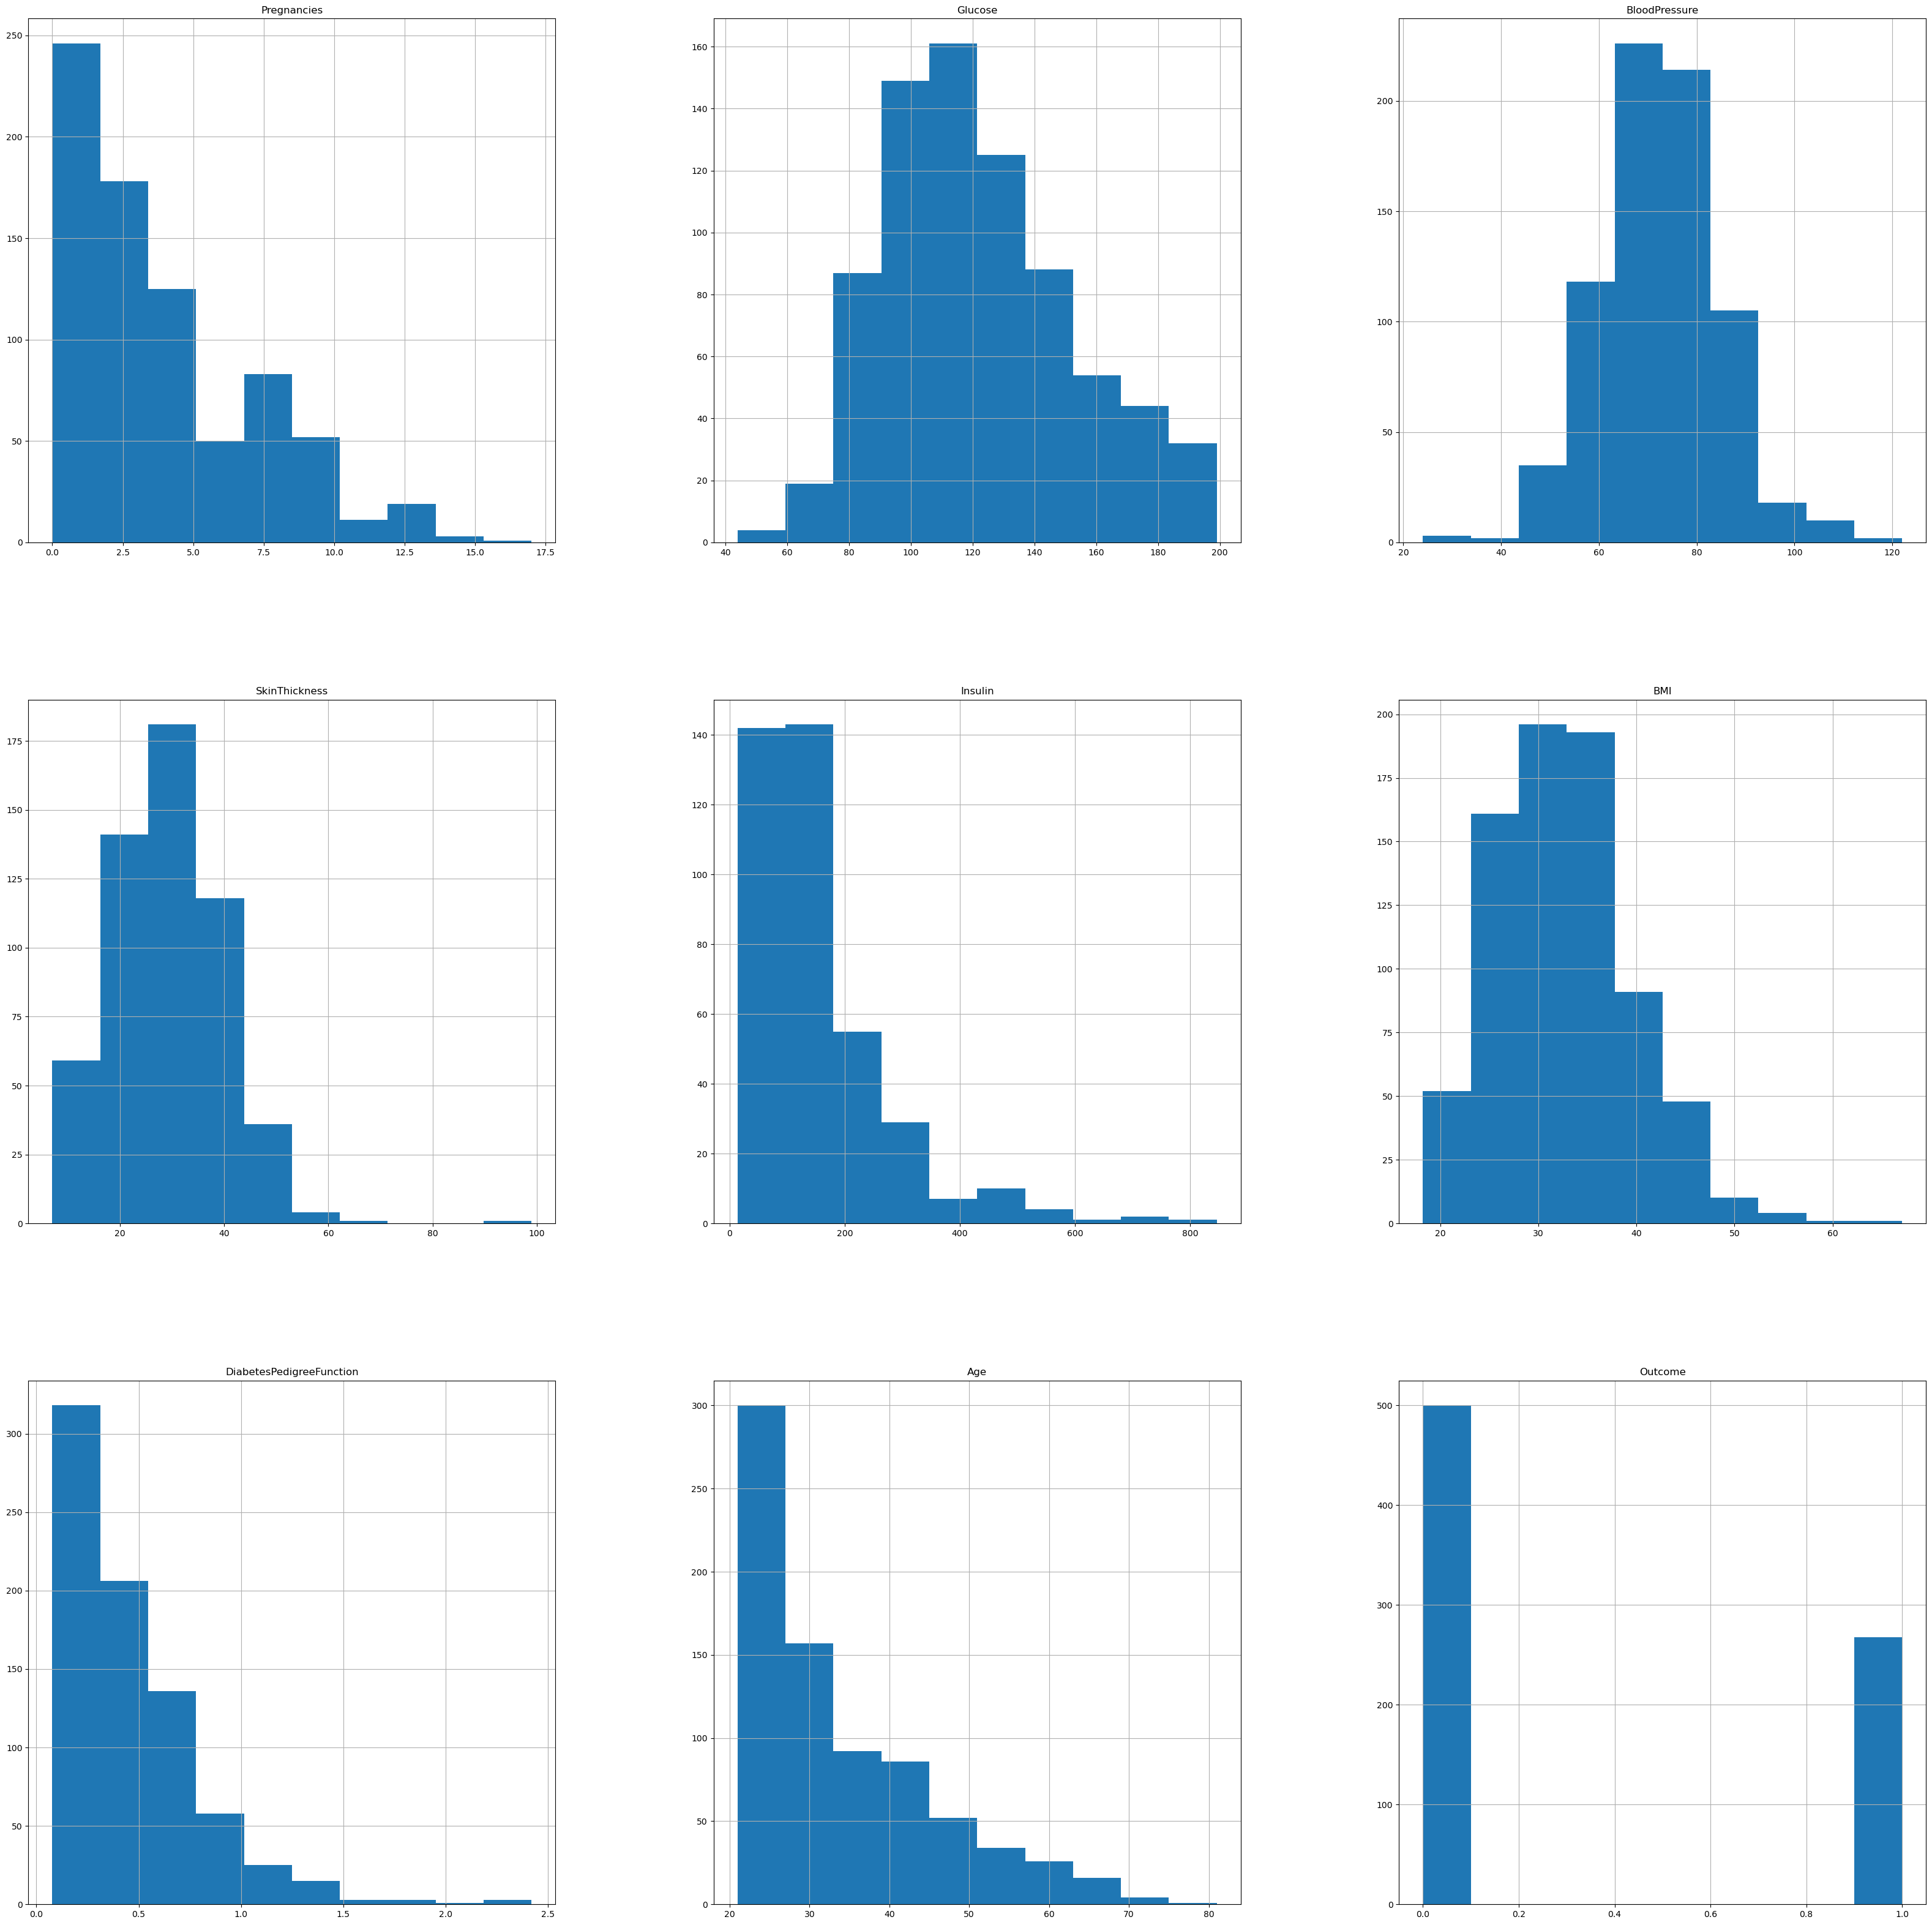

In [14]:
#Distribution 
p= dataset_copy.hist(figsize= (40 , 40))

## Imputation

In data science refers to the process of replacing missing or incomplete data with substituted

values. It’s an important technique used to handle datasets that have missing values, which is a

common issue in real-world data, in this case we are using Mean and Median 

The key difference between using mean and median:

1. Mean: 
The mean is sensitive to outliers. If the dataset contains extreme values (very high or very low), they will affect the mean significantly. This can lead to imputation that does not accurately represent the underlying data, especially if the data is skewed.

2. Median: 
The median is more robust to outliers because it represents the middle value of the data. The presence of extreme values will not influence the median as much as it does the mean.

In [42]:
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(), inplace=True)
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean(), inplace=True)
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(), inplace=True)
dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(), inplace=True)
dataset_copy['BMI'].fillna(dataset_copy['BMI'].median(), inplace=True)


dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


Outcome
0    500
1    268
Name: count, dtype: int64


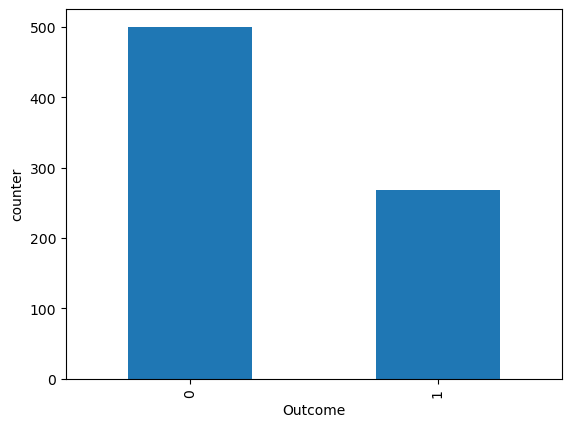

In [43]:
print(diabetes_dataset.Outcome.value_counts())
p=diabetes_dataset.Outcome.value_counts().plot(kind='bar')
plt.ylabel('counter')
plt.show()

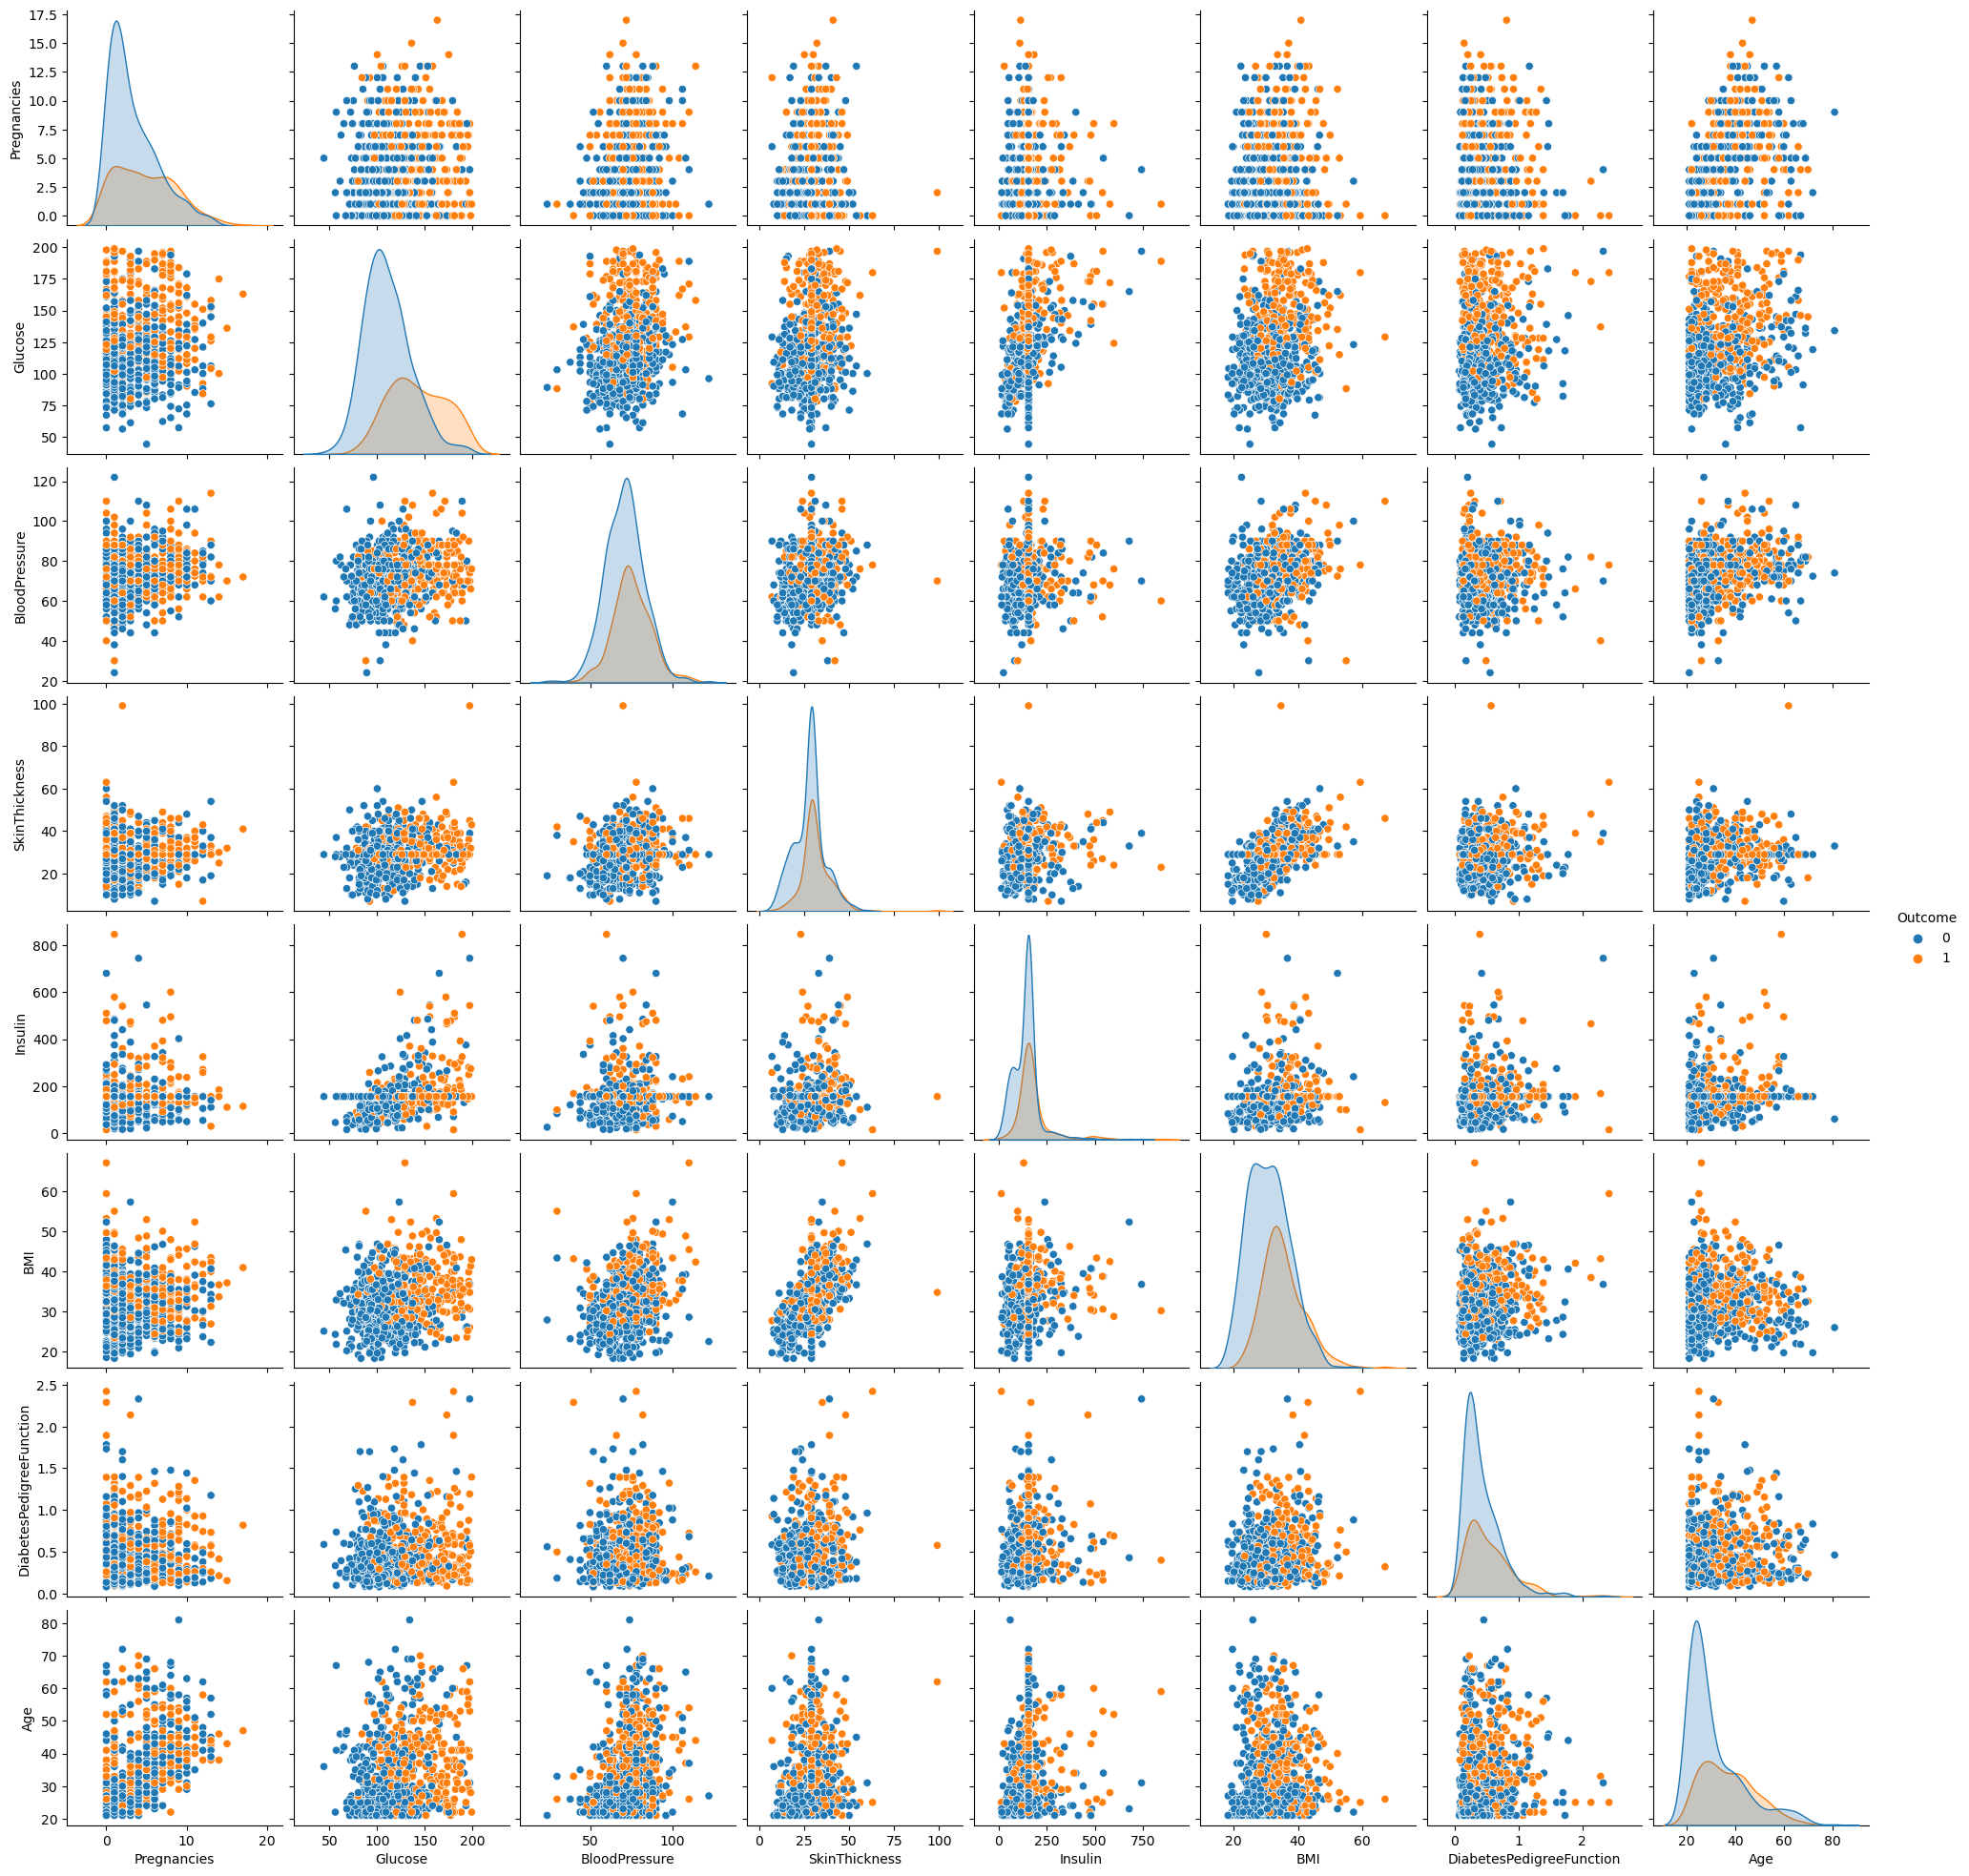

In [48]:
p=sns.pairplot(dataset_copy, hue='Outcome')

## Showing Correlation Between Features Before Cleaning

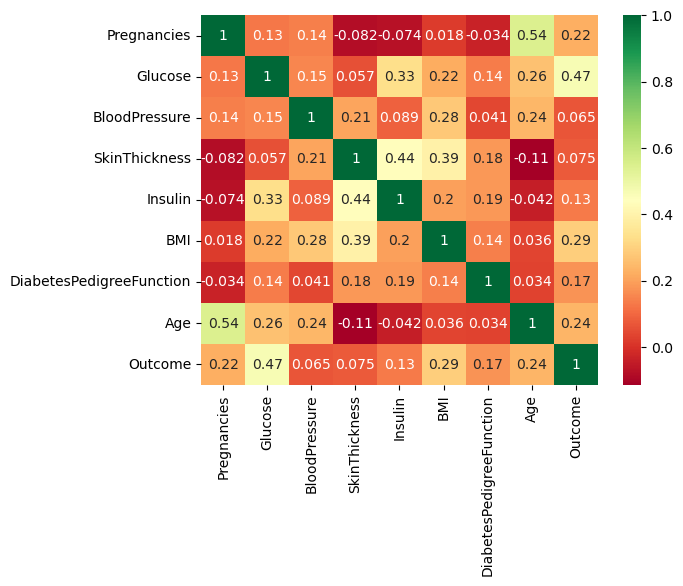

In [49]:
p=sns.heatmap(diabetes_dataset.corr(), annot = True, cmap="RdYlGn")

## Showing Correlation Between Features After Cleaning

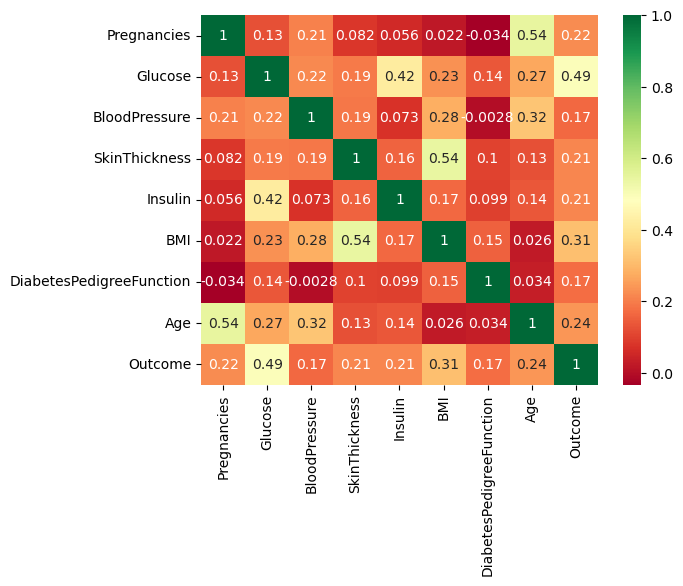

In [50]:
p=sns.heatmap(dataset_copy.corr(), annot = True, cmap="RdYlGn")

In [61]:
dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


## Standardize Data

Standardizing the data is a crucial step in many machine learning algorithms, particularly those

that involve distance-based calculations, such as K-Nearest Neighbors (KNN), Support Vector

Machines (SVM), and Gradient Descent-based models. The main reason for standardizing the

data is to ensure that all features contribute equally to the model. 

Here’s a breakdown of why it's important (for this case) :

1. To Handle Differences in Scale:
In real-world datasets, features often have different units or scales. For example, one feature could be the age of a person (ranging from 0 to 100), while another feature could be income (ranging from thousands to millions). These differences in scale can cause problems in algorithms that rely on calculating distances (like KNN) or gradients (like in neural networks).
Without standardization, the feature with the larger scale (e.g., income) would dominate the distance calculations or the optimization process, overshadowing features with smaller scales (e.g., age).


2. For Example:
If we are using KNN to predict a target, the distance between data points would be heavily influenced by features with large numerical values, distorting the results.

In [186]:
stand=StandardScaler()
dataset_train=pd.DataFrame(stand.fit_transform(dataset_copy.drop('Outcome', axis=1)))
dataset_train.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


## Splitting DataSet Into Test & Train 

In [76]:
y=dataset_copy.Outcome
x_train,x_test,y_train,y_test=train_test_split(dataset_train, y , test_size= 1/3, random_state= 42, stratify=y)

# Prediction Model

In [167]:
test_scores=[ ]
train_scores=[ ] 
for i in range (1, 15):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))



This loop helps you find the best number of neighbors (k) by comparing training and testing accuracy for different values of k. The goal is to find the k that provides the highest test accuracy while maintaining a reasonable training accuracy, ensuring the model generalizes well to new data.

In [168]:
train_scores

[1.0,
 0.8515625,
 0.86328125,
 0.828125,
 0.833984375,
 0.806640625,
 0.814453125,
 0.806640625,
 0.798828125,
 0.794921875,
 0.796875,
 0.79296875,
 0.79296875,
 0.79296875]

In [169]:
test_scores

[0.7265625,
 0.73046875,
 0.75390625,
 0.74609375,
 0.734375,
 0.73046875,
 0.75,
 0.73046875,
 0.73046875,
 0.73046875,
 0.765625,
 0.7265625,
 0.75,
 0.73828125]

In [170]:
max_train_score= max(train_scores)
max_test_score= max(test_scores)
max_train_index=[i for i, v in enumerate (train_scores) if v == max_train_score ]
max_test_index=[i for i, v in enumerate (test_scores) if v == max_test_score ]

In [185]:
print('max train score is :', max_train_score*100 , '%  with an k is : ', max_train_index)
print('max test score is :', max_test_score*100 , '%        with an k is : ', max_test_index)

max train score is : 100.0 %  with an k is :  [0]
max test score is : 76.5625 %        with an k is :  [10]


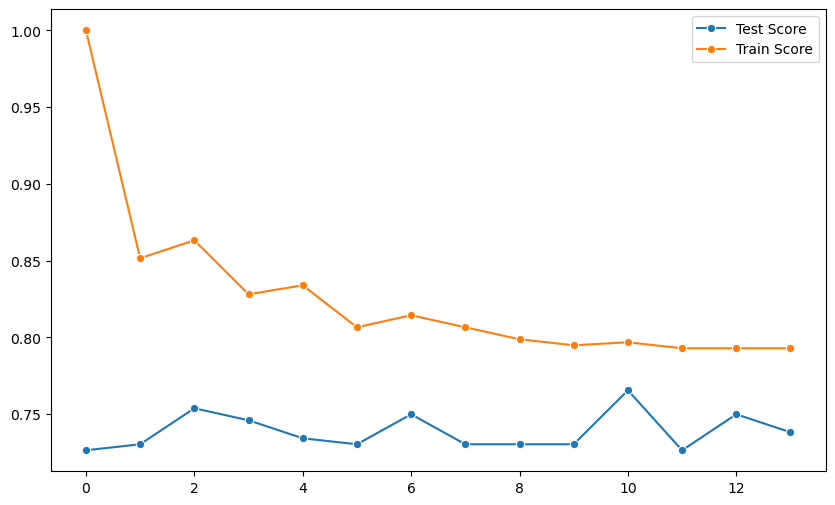

In [172]:
plt.figure(figsize=(10, 6))
p=sns.lineplot(x=range(0,14), y= test_scores , marker="o", label="Test Score")
p=sns.lineplot(x=range(0,14), y= train_scores , marker="o", label="Train Score")

Visualization: the best result of train score is on index = 10 


In [173]:
knn= KNeighborsClassifier(11)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.765625

1. The plot will show how the KNN model classifies points in a 2D space based 

on the first two features of the dataset.

2. Decision boundaries will be drawn, dividing the regions based on which class

(target label) a new data point would be classified into.

3. The KNN model predicts based on proximity to training points, so the 

boundaries will likely have a non-linear shape, particularly if the number of

neighbors (k) is large.

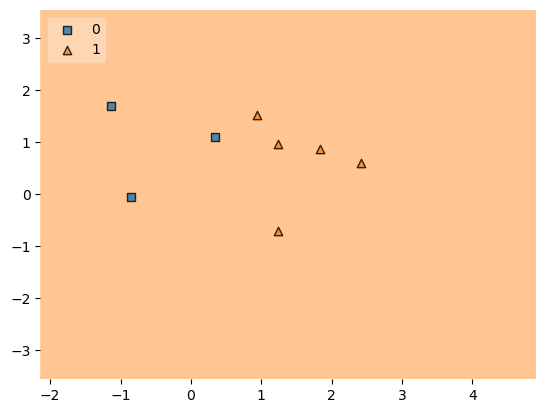

In [174]:
value= 20000
width= 20000
plot_decision_regions(dataset_train.values, y.values,
                      clf=knn, legend=2,
                      feature_index=[0, 1],  # Specify two feature indices to plot
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

plt.show()

## Confusion Matrix 

Text(0.5, 23.52222222222222, 'predicted label')

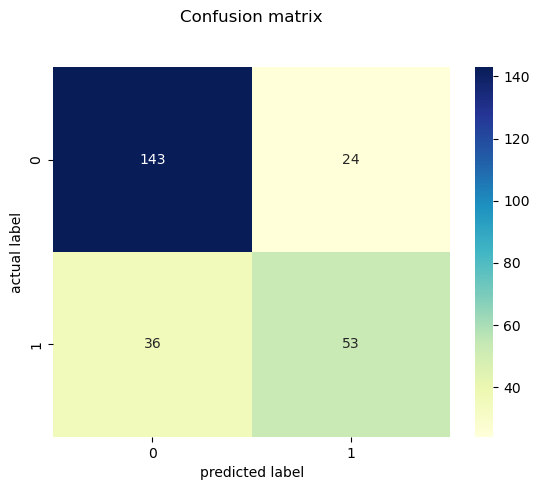

In [175]:
y_pred = knn.predict(x_test)
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
p= sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="YlGnBu", fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel("actual label")
plt.xlabel("predicted label")

### Confusion Matrix Insights:

The confusion matrix heatmap will provide a detailed breakdown of how many true

positive, true negative, false positive, and false negative predictions were 

made by the model.


By analyzing this matrix, you can assess which classes are being confused with


each other and identify areas where the model might be improved.


In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       167
           1       0.69      0.60      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



In [177]:
y_pred_proba = knn.predict_proba(x_test)[:,1]
flspr, trpr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0.5, 1.0, ' ROC CURVE ~~ knn(n_neighbors=11)')

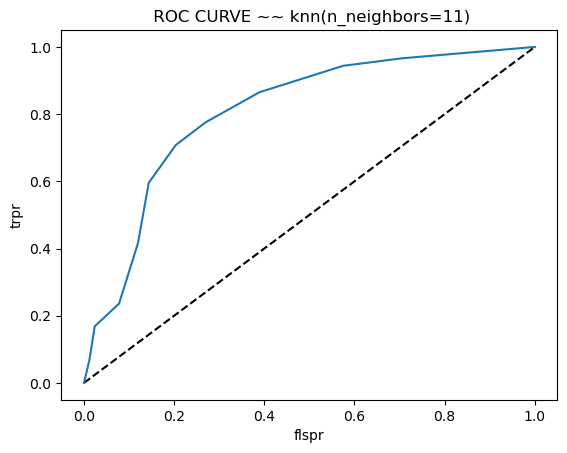

In [178]:
plt.plot([0,1], [0,1], "k--")
plt.plot(flspr, trpr, label="knn")
plt.xlabel('flspr')
plt.ylabel('trpr')
plt.title(' ROC CURVE ~~ knn(n_neighbors=11)')

### ROC Curve:

The ROC curve is a graphical representation of a classifier's performance across different

threshold values. It plots the True Positive Rate (TPR, or Sensitivity) against the False Positive

Rate (FPR, or 1 - Specificity).


A classifier that performs well will have an ROC curve that is closer to the top-left corner 

of the plot, indicating high True Positive Ratesand low False Positive Rates.


### Diagonal Line:

The diagonal line serves as a baseline for comparison. A good classifier’s ROC curve will be 

above this line,showing that it performs better than random guessing.

In [187]:
roc_auc_score(y_test, y_pred_proba)

0.8067684855009083

In [181]:
param_grid = {"n_neighbors": np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(dataset_train , y)

print('best score =' , str(knn_cv.best_score_))
print("best paraneters =", knn_cv.best_params_)

best score = 0.7748153806977337
best paraneters = {'n_neighbors': 25}


The KNN model's performance is reasonably good, with an accuracy of around 77.48%. This

means that, on average, the model correctly predicts the class of the test samples about 77.48% 

of the time.

#### Have a great day and take care of your health!
#### Exercise, eat well, and live healthily!